In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [2]:
datos = pd.read_csv('dataset_flujo_vehicular.csv')

In [4]:
datos.shape

(189814, 6)

In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189814 entries, 0 to 189813
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CODIGO_LOCACION  189814 non-null  object        
 1   HORA             189814 non-null  datetime64[ns]
 2   CANTIDAD         189814 non-null  int64         
 3   SENTIDO          189814 non-null  object        
 4   LATITUD          186412 non-null  float64       
 5   LONGITUD         186412 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 8.7+ MB


In [22]:
datos.head()

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD
0,48Q3CJ00+,2020-03-31 15:00:00,729,Interna,-34.588796,-58.381520
1,48Q3CJ00+,2020-03-31 15:00:00,447,Egreso,-34.588796,-58.381520
2,48Q39G00+,2020-03-31 15:00:00,175,Interna,-34.633299,-58.468594
3,48Q39G00+,2020-03-31 15:00:00,1186,Egreso,-34.633299,-58.468594
4,48Q3CH00+,2020-03-31 15:00:00,35,Egreso,-34.579632,-58.427733


In [19]:
datos['HORA']=pd.to_datetime(datos['HORA'],format='%d%b%Y:%H:%M:%S')


Text(0, 0.5, 'Frecuencia')

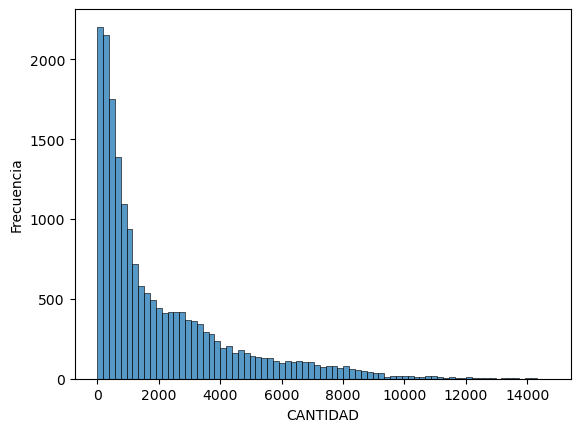

In [37]:
datos_filtrados = datos.iloc[::10]
datos_filtrados
sns.histplot(data = datos_filtrados, x ='CANTIDAD')

plt.xlabel('CANTIDAD')
plt.ylabel('Frecuencia')


In [44]:
datos['SENTIDO'].value_counts()
datos['CODIGO_LOCACION'].value_counts()

CODIGO_LOCACION
48Q3CJ00+    52812
48Q39G00+    49857
48Q3CH00+    33048
48Q39H00+    17694
48Q39J00+    17544
48Q3FG00+    15457
39H7JC00+     3245
2H2M2200+       79
27262200+       78
Name: count, dtype: int64

In [54]:
dummy_columnas = pd.get_dummies(datos['CODIGO_LOCACION'], prefix='codigo')
datos_categorizado_codigo = pd.concat([datos, dummy_columnas], axis=1)
datos_categorizado_codigo.drop(['CODIGO_LOCACION'], axis=1, inplace=True)

print(datos_categorizado_codigo.value_counts('LATITUD'))
datos_categorizado_codigo.value_counts('LONGITUD')

LATITUD
-34.588796    52812
-34.633299    49857
-34.579632    27353
-34.618036    17694
-34.608550    17544
-34.536980    15457
-34.579632     5695
Name: count, dtype: int64


LONGITUD
-58.381520    52812
-58.468594    49857
-58.427733    33048
-58.410236    17694
-58.372951    17544
-58.470968    12707
-58.470968     2750
Name: count, dtype: int64

In [52]:
datos_codigo1 = datos_categorizado_codigo.loc[datos_categorizado_codigo['']]
datos_codigo1

,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,codigo_27262200+,codigo_2H2M2200+,codigo_39H7JC00+,codigo_48Q39G00+,codigo_48Q39H00+,codigo_48Q39J00+,codigo_48Q3CH00+,codigo_48Q3CJ00+,codigo_48Q3FG00+
8351,2020-04-27 16:00:00,136,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
8373,2020-04-27 15:00:00,106,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
8374,2020-04-27 14:00:00,174,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
8399,2020-04-27 13:00:00,140,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
8400,2020-04-27 12:00:00,127,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,2020-04-24 15:00:00,82,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
9959,2020-04-24 14:00:00,156,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
9960,2020-04-24 13:00:00,135,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False
9985,2020-04-24 12:00:00,148,Interna,NaN,NaN,True,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Frecuencia')

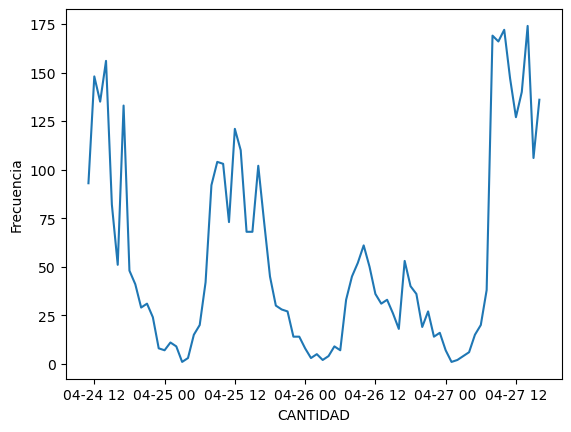

In [59]:
datos_filtrados = datos_codigo1.iloc[::]
datos_filtrados
sns.lineplot(data = datos_filtrados, x ='HORA', y = 'CANTIDAD' )




Text(0, 0.5, 'Frecuencia')

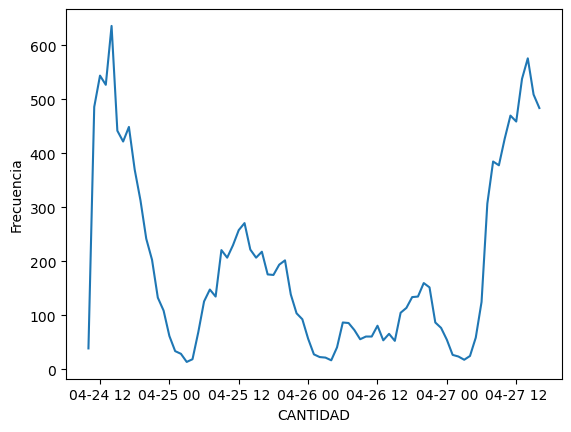

In [60]:
datos_codigo2 = datos_categorizado_codigo.loc[datos_categorizado_codigo['codigo_2H2M2200+']]
datos_codigo2
datos_filtrados = datos_codigo2.iloc[::]
datos_filtrados
sns.lineplot(data = datos_filtrados, x ='HORA', y = 'CANTIDAD' )


<Axes: xlabel='HORA', ylabel='CANTIDAD'>

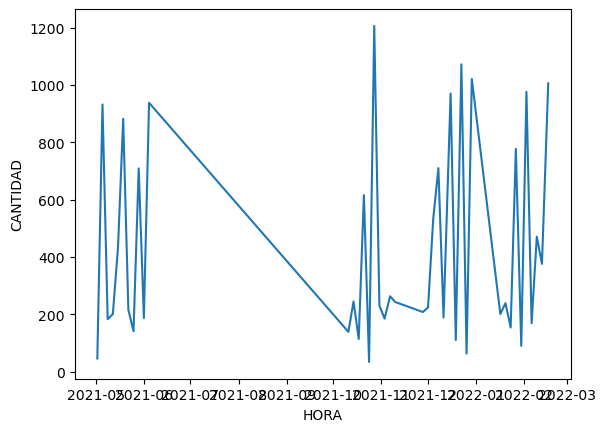

In [70]:
datos_codigo3 = datos_categorizado_codigo.loc[datos_categorizado_codigo['codigo_39H7JC00+']]
datos_codigo3
datos_filtrados = datos_codigo3.iloc[::]
datos_filtrados
sns.lineplot(data = datos_filtrados, x ='HORA', y = 'CANTIDAD' )



<Axes: xlabel='HORA', ylabel='CANTIDAD'>

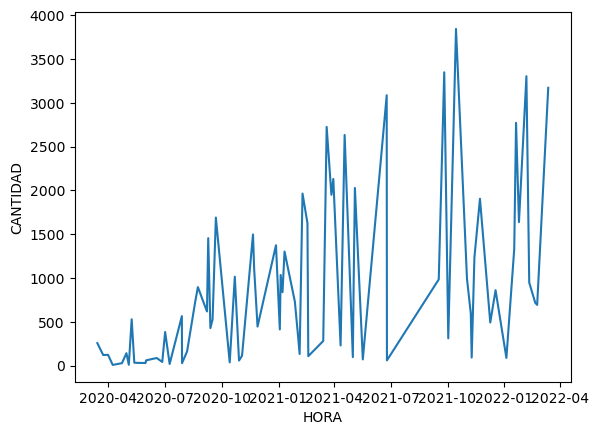

In [72]:
datos_codigo4 = datos_categorizado_codigo.loc[datos_categorizado_codigo['codigo_48Q3FG00+']]
datos_codigo4
datos_filtrados = datos_codigo4.iloc[::200]
datos_filtrados
sns.lineplot(data = datos_filtrados, x ='HORA', y = 'CANTIDAD' )